# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
import requests
import os
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(url.split('/')[-1], mode = 'wb') as file:
    file.write(response.content)
df_image = pd.read_csv('image-predictions.tsv',sep = '\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [3]:
'''
import tweepy
import json

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

df_json = pd.DataFrame(columns = ['tweet_id','retweet_count','favorite_count'])

for tweet_id in df_archive['tweet_id']:
    try:
        tweet = api.get_status(tweet_id,tweet_mode='extended')
        df_json = df_json.append({'tweet_id' : tweet._json['id_str'],'retweet_count' : tweet._json['retweet_count'], 'favorite_count' : tweet._json['favorite_count']}, ignore_index=True)
    except:
        pass

df_json.to_csv('tweet_json.txt')
'''
df_json = pd.read_csv('tweet_json.txt')

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [4]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [6]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [7]:
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [8]:
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [9]:
print(df_archive['doggo'].value_counts(),df_archive['floofer'].value_counts(),
     df_archive['pupper'].value_counts(),df_archive['puppo'].value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64 None       2346
floofer      10
Name: floofer, dtype: int64 None      2099
pupper     257
Name: pupper, dtype: int64 None     2326
puppo      30
Name: puppo, dtype: int64


In [10]:
df_image.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1686,814638523311648768,https://pbs.twimg.com/media/C04taUjWIAA6Mo4.jpg,2,golden_retriever,0.650814,True,kuvasz,0.053281,True,cocker_spaniel,0.035440,True
2032,883360690899218434,https://pbs.twimg.com/media/DEJT3FeXoAAtwUy.jpg,1,chow,0.987997,True,Tibetan_mastiff,0.007099,True,Newfoundland,0.002140,True
1570,794926597468000259,https://pbs.twimg.com/media/CwglhZVXgAAc3_w.jpg,1,teddy,0.569566,False,bath_towel,0.173745,False,toy_poodle,0.037662,True
1782,828770345708580865,https://pbs.twimg.com/media/C4BiOXOXAAAf6IS.jpg,1,seat_belt,0.765979,False,Chesapeake_Bay_retriever,0.033899,True,polecat,0.027252,False
1188,739544079319588864,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
295,671357843010908160,https://pbs.twimg.com/media/CVEkZaPXIAEw5vr.jpg,1,Italian_greyhound,0.831757,True,toy_terrier,0.043306,True,Chihuahua,0.036773,True
1689,815639385530101762,https://pbs.twimg.com/media/C1G7sXyWIAA10eH.jpg,1,German_shepherd,0.817953,True,Norwegian_elkhound,0.140007,True,malinois,0.024821,True
670,683098815881154561,https://pbs.twimg.com/media/CXrawAhWkAAWSxC.jpg,1,golden_retriever,0.889848,True,kuvasz,0.053008,True,Labrador_retriever,0.037881,True
1454,777189768882946048,https://pbs.twimg.com/media/Cskh9nRWYAAUxBP.jpg,2,Chihuahua,0.988412,True,Mexican_hairless,0.004177,True,hog,0.001507,False
1634,805958939288408065,https://pbs.twimg.com/media/CtzKC7zXEAALfSo.jpg,1,Irish_setter,0.574557,True,golden_retriever,0.339251,True,seat_belt,0.046108,False


In [11]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
df_json.sample(10)

,Unnamed: 0,tweet_id,retweet_count,favorite_count
779,779,772615324260794368,3174,0
239,239,845098359547420673,7062,0
468,468,814578408554463233,5541,0
823,823,766078092750233600,2461,0
684,684,785927819176054784,3042,10982
423,423,819924195358416896,4611,12423
644,644,790946055508652032,4456,16111
535,535,804026241225523202,15294,42744
534,534,804413760345620481,3065,0
420,420,820078625395449857,5897,18948


In [13]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Unnamed: 0      870 non-null    int64
 1   tweet_id        870 non-null    int64
 2   retweet_count   870 non-null    int64
 3   favorite_count  870 non-null    int64
dtypes: int64(4)
memory usage: 27.3 KB


### Quality issues
1. **Visual Assessment:** The twitter archive has missing values for in_reply_to and retweeted_status columns. Entries that contain data for these columns most likely indicate that these tweets are not the original post but instead are retweets or forwarded tweets. 

2. **Programmatic Assessment:** The twitter archive has missing values for the expanded_urls column.

3. Tweet IDs are of integer type across all of the data sources, but should be strings instead. 

4. There are inconsistent numbers of entries from the different data sources, with the additional data pulled from the Twitter representing the fewest at only 870 entries.

5. The timestamp data are string instead of datetimes data types.

6. There are a number of rating_numerators that are below 10. Given the base denominator is 10, these entries were probably erroneous.

7. Some rating_denominators are not equal to 10, creating an inconsistent base 

8. The entries for the dog type columns (doggo, fluffer, pupper and puppo) are typically "None."

### Tidiness issues
1. The twitter archive, the neural-network image, and the additional twitter data pulled using the API should be combined into one table.

2. The additional json twitter data ended up having the index column duplicated. Eliminate all duplicated columns in final output.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [14]:
# Make copies of original pieces of data
df_archive_clean = df_archive.copy()
df_image_clean = df_image.copy()
df_json_clean = df_json.copy()

### Issue #1 (Quality Issues):

#### Define:
1. Drop rows with non-null entries for "in_reply_to" and "retweeted_status" columns, then drop the columns themselves since these types of tweets are not what we're looking for in this analysis.
2. Drop rows with null entries for "expanded_urls" column.
3. Convert data types for "tweet_id" columns from integer to string for all tables.
4. Do an inner join across the tables based on the 870 Tweet IDs found from the additional twitter API pull. (This also resolves the 1st tidiness issue)
5. Convert timestamp data to datetime data types from string types.
6. Manually evaluate the rating numerator data that is below 10. If a clear error can be discerned, fix the error, otherwise drop the row.
7. Manually evaluate the rating denominator data that is different than 10. If a clear error can be discerned, fix the error, otherwise drop the row.
8. The entries for the dog type columns (doggo, fluffer, pupper and puppo) are too incomplete to make any meaningful observations. It's best to just drop these columns.

#### Code

In [15]:
df_archive_clean.drop(df_archive_clean[df_archive_clean['in_reply_to_status_id'].isnull() == False].index,inplace = True)
df_archive_clean.drop(df_archive_clean[df_archive_clean['retweeted_status_id'].isnull() == False].index,inplace = True)
df_archive_clean.drop(df_archive_clean[df_archive_clean['expanded_urls'].isnull() == True].index,inplace = True)
df_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id',
                       'retweeted_status_timestamp','doggo','floofer','pupper','puppo'],axis=1,inplace=True)
df_archive_clean['tweet_id'] = df_archive_clean['tweet_id'].astype(str)
df_image_clean['tweet_id'] = df_image_clean['tweet_id'].astype(str)
df_json_clean['tweet_id'] = df_json_clean['tweet_id'].astype(str)
df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean['timestamp'])
df_archive_master = pd.merge(df_archive_clean,df_image_clean,on='tweet_id')
df_archive_master = pd.merge(df_archive_master,df_json_clean,on='tweet_id')

In [16]:
#Manual review of sub 10 numerator ratings and denominator ratings not equal to 10
#Upon manual inspection, it appears these rating tweets have inconsistencies with the json data.
#Since there are relatively few entries, it will easiest to remove this questionable data points.
df_archive_master.drop(df_archive_master[df_archive_master['rating_numerator'] < 10].index,inplace = True)
df_archive_master.drop(df_archive_master[df_archive_master['rating_denominator'] != 10].index,inplace = True)
#A few of entries are significant outliers in terms of rating_denominator. This skews the data.
df_archive_master.drop(df_archive_master[df_archive_master['rating_numerator'] > 20].index,inplace = True)

#### Test

In [17]:
df_archive_master.head()
df_archive_master.shape
df_archive_master.describe()
df_archive_master.info()
df_archive_master.sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 632 entries, 0 to 645
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            632 non-null    object             
 1   timestamp           632 non-null    datetime64[ns, UTC]
 2   source              632 non-null    object             
 3   text                632 non-null    object             
 4   expanded_urls       632 non-null    object             
 5   rating_numerator    632 non-null    int64              
 6   rating_denominator  632 non-null    int64              
 7   name                632 non-null    object             
 8   jpg_url             632 non-null    object             
 9   img_num             632 non-null    int64              
 10  p1                  632 non-null    object             
 11  p1_conf             632 non-null    float64            
 12  p1_dog              632 non-null    

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Unnamed: 0,retweet_count,favorite_count
386,809084759137812480,2016-12-14 17:16:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Wallace. You said you brushed your tee...,https://twitter.com/dog_rates/status/809084759...,11,10,Wallace,https://pbs.twimg.com/media/CzpyM41UoAE1b2w.jpg,1,...,True,bloodhound,0.017134,True,Labrador_retriever,0.011761,True,507,3363,12750
413,801958328846974976,2016-11-25 01:18:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Ronnie. He hopes you're having a great...,https://twitter.com/dog_rates/status/801958328...,12,10,Ronnie,https://pbs.twimg.com/media/CyEg2AXUsAA1Qpf.jpg,1,...,True,American_Staffordshire_terrier,0.271916,True,Labrador_retriever,0.247619,True,550,1619,7484
613,765395769549590528,2016-08-16 03:52:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is my dog. Her name is Zoey. She knows I'...,https://twitter.com/dog_rates/status/765395769...,13,10,my,https://pbs.twimg.com/media/Cp87Y0jXYAQyjuV.jpg,1,...,True,Cardigan,0.330401,True,Shetland_sheepdog,0.038875,True,828,3177,25513
132,859607811541651456,2017-05-03 03:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Sorry for the lack of posts today. I came home...,https://twitter.com/dog_rates/status/859607811...,13,10,None,https://pbs.twimg.com/media/C-3wvtxXcAUTuBE.jpg,1,...,True,Irish_setter,0.024099,True,Labrador_retriever,0.019285,True,161,1376,17080
570,773191612633579521,2016-09-06 16:10:20+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Grey. He's the dogtor in charge of you...,https://twitter.com/dog_rates/status/773191612...,12,10,Grey,https://pbs.twimg.com/media/CrrtqjdXEAINleR.jpg,1,...,True,Shih-Tzu,0.219256,True,Welsh_springer_spaniel,0.144614,True,776,3876,9552
248,832032802820481025,2017-02-16 01:04:13+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Miguel. He was the only remaining dogg...,"https://www.petfinder.com/petdetail/34918210,h...",12,10,Miguel,https://pbs.twimg.com/media/C4v5a4UWcAIRygc.jpg,1,...,True,Ibizan_hound,0.152662,True,Italian_greyhound,0.135055,True,329,4371,17051
274,828046555563323392,2017-02-05 01:04:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sailer. He waits on the roof for his o...,https://twitter.com/dog_rates/status/828046555...,13,10,Sailer,https://pbs.twimg.com/media/C33P8PrUcAMiQQs.jpg,3,...,False,window_screen,0.131295,False,boathouse,0.046393,False,360,2704,11230
251,831670449226514432,2017-02-15 01:04:21+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Daisy. She has a heart on her butt. 13...,https://twitter.com/dog_rates/status/831670449...,13,10,Daisy,https://pbs.twimg.com/media/C4qv3JUW8AADirb.jpg,1,...,True,Cardigan,0.362861,True,Appenzeller,0.003926,True,333,1712,9963
488,788150585577050112,2016-10-17 22:51:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Leo. He's a golden chow. Rather h*ckin...,https://twitter.com/dog_rates/status/788150585...,13,10,Leo,https://pbs.twimg.com/media/CvASw6dWcAQmo3X.jpg,3,...,True,Pomeranian,0.112704,True,Chihuahua,0.015883,True,666,1216,5892
259,830583320585068544,2017-02-12 01:04:29+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Lilly. She just parallel barked. Kindl...,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,...,True,seat_belt,0.057091,False,pug,0.011933,True,341,15680,63514


### Issue #2 (Tidiness Issues):

#### Define
**I want to analyze if there are any relationships between rating, likes, reteweets and dog types. Other column data is not relevant for this purpose, and may be dropped.**
1. Confirm the inner join based on the minimum complete data sets corresponding with tweet IDs has been resolved. (Overlaps with 4th quality issue)
2. Eliminate all duplicated and unnecessary columns in final table.

#### Code

In [18]:
df_archive_master.drop(['Unnamed: 0','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1,inplace=True)

#### Test

In [19]:
df_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,7121,34301
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,5366,29742
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,3530,22381
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,7324,37488
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,7872,35805


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [20]:
df_archive_master.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [21]:
df_archive_master.describe()

,rating_numerator,rating_denominator,img_num,p1_conf,retweet_count,favorite_count
count,632.000000,632.0,632.000000,632.000000,632.000000,632.000000
mean,12.107595,10.0,1.357595,0.625676,4346.781646,16817.055380
std,0.960952,0.0,0.741763,0.259876,4898.170295,13790.045269
min,10.000000,10.0,1.000000,0.063152,142.000000,1745.000000
25%,12.000000,10.0,1.000000,0.395837,1961.750000,8397.500000
50%,12.000000,10.0,1.000000,0.649606,2961.500000,12785.500000
75%,13.000000,10.0,1.000000,0.862207,4676.000000,20810.750000
max,14.000000,10.0,4.000000,0.999953,52566.000000,125940.000000


In [33]:
df_archive_master[df_archive_master['p1_dog'] == True].groupby(['p1'])[['rating_numerator','retweet_count','favorite_count']].mean().sort_values(by=['rating_numerator'],ascending=False).head(10).reset_index()

,p1,rating_numerator,retweet_count,favorite_count
0,black-and-tan_coonhound,14.0,6716.0,29645.0
1,Bedlington_terrier,13.5,3383.0,16821.0
2,Afghan_hound,13.0,6511.5,19348.0
3,Dandie_Dinmont,13.0,1639.0,7217.0
4,giant_schnauzer,13.0,8320.0,29614.0
5,Appenzeller,13.0,1694.0,10527.0
6,Australian_terrier,13.0,4524.0,17447.0
7,curly-coated_retriever,13.0,2551.0,10368.0
8,boxer,13.0,8714.5,31831.5
9,borzoi,13.0,4041.0,20306.0


In [34]:
df_archive_master[df_archive_master['p1_dog'] == True].groupby(['p1'])[['rating_numerator','retweet_count','favorite_count']].mean().sort_values(by=['retweet_count'],ascending=False).head(10).reset_index()

,p1,rating_numerator,retweet_count,favorite_count
0,English_springer,12.000,20430.000000,54643.500000
1,standard_poodle,12.500,18059.000000,44045.500000
2,Lakeland_terrier,12.000,14793.000000,46567.000000
3,boxer,13.000,8714.500000,31831.500000
4,giant_schnauzer,13.000,8320.000000,29614.000000
5,Samoyed,12.625,6963.125000,23186.937500
6,black-and-tan_coonhound,14.000,6716.000000,29645.000000
7,Pomeranian,12.250,6531.000000,20496.000000
8,French_bulldog,12.500,6528.071429,27603.642857
9,Afghan_hound,13.000,6511.500000,19348.000000


In [35]:
df_archive_master[df_archive_master['p1_dog'] == True].groupby(['p1'])[['rating_numerator','retweet_count','favorite_count']].mean().sort_values(by=['favorite_count'],ascending=False).head(10).reset_index()

,p1,rating_numerator,retweet_count,favorite_count
0,English_springer,12.0,20430.000000,54643.500000
1,Lakeland_terrier,12.0,14793.000000,46567.000000
2,standard_poodle,12.5,18059.000000,44045.500000
3,boxer,13.0,8714.500000,31831.500000
4,black-and-tan_coonhound,14.0,6716.000000,29645.000000
5,giant_schnauzer,13.0,8320.000000,29614.000000
6,French_bulldog,12.5,6528.071429,27603.642857
7,Saluki,13.0,5319.000000,27155.000000
8,Irish_terrier,13.0,3669.000000,24891.000000
9,Italian_greyhound,11.5,5434.750000,24392.000000


### Insights:
1. There seems to be a sweet spot for a rating of 13 in terms of retweet and favorite count.

2. The top 10 highest average rated dog types all have average ratings between 12 - 14, with little variance.

3. In terms of dog types, English Springers, Lakeland Terriers and Standard Poodles all have the most retweets and likes with a significant edge over the other dog types.

### Visualization

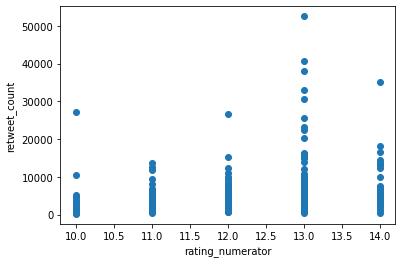

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df_archive_master['rating_numerator'],df_archive_master['retweet_count'])
plt.xlabel("rating_numerator")
plt.ylabel("retweet_count")
plt.show()

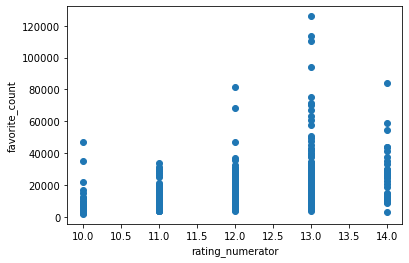

In [24]:
plt.scatter(df_archive_master['rating_numerator'],df_archive_master['favorite_count'])
plt.xlabel("rating_numerator")
plt.ylabel("favorite_count")
plt.show()

<AxesSubplot:xlabel='p1'>

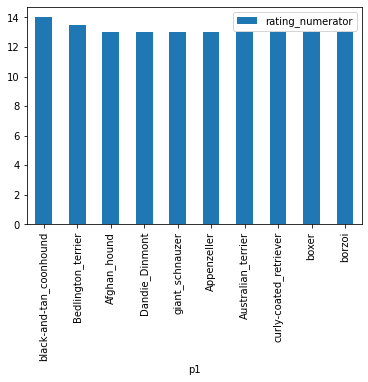

In [30]:
df_archive_master[df_archive_master['p1_dog'] == True].groupby(['p1'])[['rating_numerator','retweet_count','favorite_count']].mean().sort_values(by=['rating_numerator'],ascending=False).head(10).reset_index().plot.bar(x='p1',y='rating_numerator')

<AxesSubplot:xlabel='p1'>

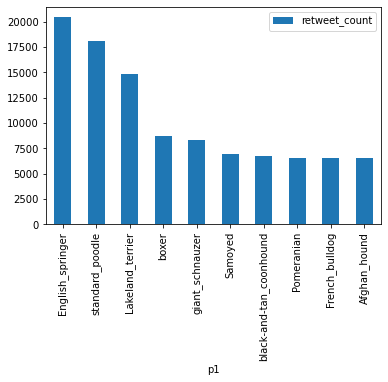

In [37]:
df_archive_master[df_archive_master['p1_dog'] == True].groupby(['p1'])[['rating_numerator','retweet_count','favorite_count']].mean().sort_values(by=['retweet_count'],ascending=False).head(10).reset_index().plot.bar(x='p1',y='retweet_count')

<AxesSubplot:xlabel='p1'>

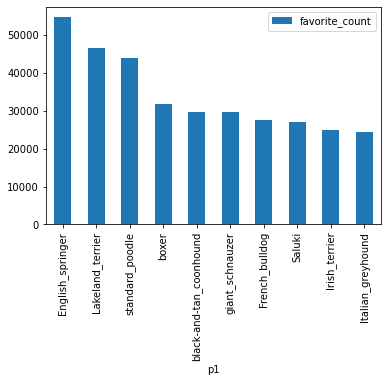

In [40]:
df_archive_master[df_archive_master['p1_dog'] == True].groupby(['p1'])[['rating_numerator','retweet_count','favorite_count']].mean().sort_values(by=['favorite_count'],ascending=False).head(10).reset_index().plot.bar(x='p1',y='favorite_count')